# Setup the dataframe

In [1]:
import pandas as pd
import os
from datetime import datetime, timezone
import time
import matplotlib.pyplot as plt
import numpy as np

all_data = pd.DataFrame()

# Be careful with this. If there is more than one CSV file only the last one will be used. 
for file in os.listdir('./'):
    if file.endswith('csv'):
        all_data = pd.read_csv('./' + file, sep=';')
        print("Using file: " + file)


Using file: 2020_08_10_11_49_14.csv


## Setup the Date_Time_(GMT) column

In [2]:
start = time.time()

all_data['PLC_TIME(Timedate48)'] = all_data['PLC_TIME(Timedate48)'].astype(str)

def getUnixTime(date):
    return date.split(',')[0]

def convertToUTC(date):
    return datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

def convertToGMT(unix_timestamp):
    utcTime = datetime.fromtimestamp(unix_timestamp, timezone.utc)
    localTime = utcTime.astimezone()
    return localTime.strftime("%Y-%m-%d %H:%M:%S")
    
all_data['Date_Time_(GMT)'] = all_data['PLC_TIME(Timedate48)'].apply(lambda x: getUnixTime(x))
all_data['Date_Time_(GMT)'] = all_data['Date_Time_(GMT)'].astype('int32')
all_data['Date_Time_(GMT)'] = all_data['Date_Time_(GMT)'].apply(lambda x: convertToGMT(x))
column_name = 'Date_Time_(GMT)'
first_column = all_data.pop(column_name)
all_data.insert(0, column_name, first_column)
all_data['Date_Time_(GMT)'] = pd.to_datetime(all_data['Date_Time_(GMT)'])
all_data = all_data.sort_values(by='Date_Time_(GMT)')

duration = time.time() - start
print("Total time: %10.2f" % duration)

all_data.tail()

Total time:       2.20


,Date_Time_(GMT),TIME,PLC_TIME_OFFSET(Integer8),PLC_TIME_CV(Enum2),PLC_TIME(Timedate48),EVR_VehicleNumber(Unsigned16),EVR_TIME_CV(Enum2),EVR_TIME(Timedate48),EVR_Speed(Unsigned16),EVR_Speed_CV(Enum2),...,AL1213_COACH7(Boolean1),AL1213_COACH8(Boolean1),AL1213_COACH9(Boolean1),AL1213_COACH10(Boolean1),AL1213_COACH11(Boolean1),AL1213_COACH12(Boolean1),AL1213_COACH13(Boolean1),AL1213_COACH14(Boolean1),AL1213_COACH15(Boolean1),AL1213_COACH16(Boolean1)
152336,2020-08-11 09:29:26,"77996,032",0,1,"1597134566,000",15004,1,"1597134566,000",0,1,...,0,0,0,0,0,0,0,0,0,0
152337,2020-08-11 09:29:26,"77996,544",0,1,"1597134566,000",15004,1,"1597134567,000",0,1,...,0,0,0,0,0,0,0,0,0,0
152339,2020-08-11 09:29:27,"77997,568",0,1,"1597134567,000",15004,1,"1597134568,000",0,1,...,0,0,0,0,0,0,0,0,0,0
152338,2020-08-11 09:29:27,"77997,056",0,1,"1597134567,000",15004,1,"1597134567,000",0,1,...,0,0,0,0,0,0,0,0,0,0
152340,2020-08-11 09:29:28,"77998,080",0,1,"1597134568,000",15004,1,"1597134568,000",0,1,...,0,0,0,0,0,0,0,0,0,0


#### Cleanup the NaN entries

In [3]:
print("Rows before: " + str(all_data.shape[0]))
all_data = all_data.dropna(how='all')
print("Rows after: " + str(all_data.shape[0]))
all_data.head()

Rows before: 152341
Rows after: 152341


,Date_Time_(GMT),TIME,PLC_TIME_OFFSET(Integer8),PLC_TIME_CV(Enum2),PLC_TIME(Timedate48),EVR_VehicleNumber(Unsigned16),EVR_TIME_CV(Enum2),EVR_TIME(Timedate48),EVR_Speed(Unsigned16),EVR_Speed_CV(Enum2),...,AL1213_COACH7(Boolean1),AL1213_COACH8(Boolean1),AL1213_COACH9(Boolean1),AL1213_COACH10(Boolean1),AL1213_COACH11(Boolean1),AL1213_COACH12(Boolean1),AL1213_COACH13(Boolean1),AL1213_COACH14(Boolean1),AL1213_COACH15(Boolean1),AL1213_COACH16(Boolean1)
0,1970-01-01,"0,000",0,0,"0,000",15004,1,"1597056551,000",0,1,...,0,0,0,0,0,0,0,0,0,0
381,1970-01-01,"195,072",0,0,"0,000",15004,1,"1597056746,000",0,1,...,0,0,0,0,0,0,0,0,0,0
382,1970-01-01,"195,584",0,0,"0,000",15004,1,"1597056747,000",0,1,...,0,0,0,0,0,0,0,0,0,0
383,1970-01-01,"196,096",0,0,"0,000",15004,1,"1597056747,000",0,1,...,0,0,0,0,0,0,0,0,0,0
384,1970-01-01,"196,608",0,0,"0,000",15004,1,"1597056748,000",0,1,...,0,0,0,0,0,0,0,0,0,0


In [19]:
all_data.tail(100)

,Date_Time_(GMT),PLC_TIME_CV(Enum2),EVR_Speed(Unsigned16),WSP_RefSpeed(Unsigned16),WSP_Speed_Ax4_CV(Enum2),WSP_Speed_Ax4(Unsigned16),WSP_Speed_Ax3_CV(Enum2),WSP_Speed_Ax3(Unsigned16),WSP_Speed_Ax2_CV(Enum2),WSP_Speed_Ax2(Unsigned16),...,PLC_CAR4_NUMBER(Unsigned16),PLC_CAR3_NUMBER(Unsigned16),PLC_CAR2_NUMBER(Unsigned16),PLC_CAR1_NUMBER(Unsigned16),AL1050_COACH1(Boolean1),AL1050_COACH4(Boolean1),AL1048_COACH4(Boolean1),AL1049_COACH1(Boolean1),AL1049_COACH4(Boolean1),AL2195_COACH4(Boolean1)
152241,2020-08-11 09:28:37,1,0,0,1,0,1,0,1,0,...,15302,15205,15107,15004,0,0,0,0,0,0
152243,2020-08-11 09:28:38,1,0,0,1,0,1,0,1,0,...,15302,15205,15107,15004,0,0,0,0,0,0
152242,2020-08-11 09:28:38,1,0,0,1,0,1,0,1,0,...,15302,15205,15107,15004,0,0,0,0,0,0
152244,2020-08-11 09:28:39,1,0,0,1,0,1,0,1,0,...,15302,15205,15107,15004,0,0,0,0,0,0
152245,2020-08-11 09:28:39,1,0,0,1,0,1,0,1,0,...,15302,15205,15107,15004,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152336,2020-08-11 09:29:26,1,0,0,1,0,1,0,1,0,...,15302,15205,15107,15004,0,0,0,0,0,0
152337,2020-08-11 09:29:26,1,0,0,1,0,1,0,1,0,...,15302,15205,15107,15004,0,0,0,0,0,0
152339,2020-08-11 09:29:27,1,0,0,1,0,1,0,1,0,...,15302,15205,15107,15004,0,0,0,0,0,0
152338,2020-08-11 09:29:27,1,0,0,1,0,1,0,1,0,...,15302,15205,15107,15004,0,0,0,0,0,0


### Remove string columns

In [4]:
import numpy as np
HABD_cols = [col for col in all_data if not 'Date_Time_(GMT)' in col]
before = all_data.shape[1]

for col in HABD_cols:
    if all_data.dtypes[col] == np.object:
        del all_data[col]

print("Columns removed: " + str(before - all_data.shape[1]))
print("Columns in all_data: " + str(all_data.shape[1]))

Rows removed: 3
cols in all_data: 546


### Remove 0 data columns

In [5]:
HABD_cols = [col for col in all_data if not 'Date_Time_(GMT)' in col]
before = all_data.shape[1]

for col in HABD_cols:
    if all_data[col].sum() == 0:
        del all_data[col]

print("Columns removed: " + str(before - all_data.shape[1]))
print("Columns in all_data: " + str(all_data.shape[1]))

Rows removed: 418
cols in all_data: 128


### Setup HABD_columns for removal

In [6]:
HABD_columns = []
HABD_columns.append('EVR_VehicleNumber(Unsigned16)')   # Remove
HABD_columns.append('EVR_TIME_CV(Enum2)')
HABD_columns.append('EVR_Speed_CV(Enum2)')
HABD_columns.append('EVR_Distance(Unsigned32)')
HABD_columns.append('HABD_HighTemp(Unsigned16)')

print("Columns in list: " + str(len(HABD_columns)))
print("Columns in all_data: " + str(all_data.shape[1]))
print("Rows in all_data: " + str(all_data.shape[0]))

Columns in list: 5
Columns in all_data: 128
Rows in all_data: 152341


##### Remove HABD_columns

In [7]:
before = all_data.shape[1]
#all_data.drop(HABD_columns, axis=1)
for column in HABD_columns:
    del all_data[column]
# HABD_columns.pop(0) # removes useless column 115, 115 ...
print("Columns removed: " + str(before - all_data.shape[1]))
print("Columns in all_data: " + str(all_data.shape[1]))
print("Rows in all_data: " + str(all_data.shape[0]))

Columns removed: 5
Columns in all_data: 123
Rows in all_data: 152341


### Check the data counts

In [13]:
HABD_cols = [col for col in all_data if not 'NUMBER' in col]

for col in HABD_cols[1:]:
    print(all_data[col].value_counts())

1    32501
Name: PLC_TIME_CV(Enum2), dtype: int64
18    22194
19    10307
Name: HABD_TempCh10_Car1(Integer16), dtype: int64
19    29794
0      2618
20       89
Name: HABD_TempCh9_Car8(Integer16), dtype: int64
20    29881
0      2620
Name: HABD_TempCh9_Car7(Integer16), dtype: int64
19    24384
20     5497
0      2620
Name: HABD_TempCh9_Car6(Integer16), dtype: int64
18    24097
19     5784
0      2620
Name: HABD_TempCh9_Car5(Integer16), dtype: int64
20    29881
0      2620
Name: HABD_TempCh9_Car4(Integer16), dtype: int64
19    24316
20     3894
0      2618
18     1673
Name: HABD_TempCh9_Car3(Integer16), dtype: int64
18    23324
19     6557
0      2620
Name: HABD_TempCh9_Car2(Integer16), dtype: int64
19    32501
Name: HABD_TempCh9_Car1(Integer16), dtype: int64
20    15093
21    14790
0      2618
Name: HABD_TempCh8_Car8(Integer16), dtype: int64
19    29792
0      2620
20       89
Name: HABD_TempCh8_Car7(Integer16), dtype: int64
20    29881
0      2620
Name: HABD_TempCh8_Car6(Integer16), dt

### Check the temperature counts

# Graph a coach's temperature spikes

### Isolate the columns

In [71]:
new_column = 'HABD_TempCh10_Car1(Integer16)'
start_date = '2020-08-11 08:00:00'
end_date = '2020-08-11 09:29:28'

coach_plot = pd.DataFrame()
coach_plot['Date_Time_(GMT)'] = all_data['Date_Time_(GMT)']
coach_plot[new_column] = all_data[new_column]

mask = (coach_plot['Date_Time_(GMT)'] > start_date) & (coach_plot['Date_Time_(GMT)'] <= end_date)
coach_plot = coach_plot.loc[mask]

# print(coach_plot.loc[mask]) # select the masked timeframe

# coach_plot

In [70]:
coach_plot.loc[coach_plot[new_column] >= 10]
# coach_plot.head()
all_data.tail()

,Date_Time_(GMT),PLC_TIME_CV(Enum2),EVR_Speed(Unsigned16),WSP_RefSpeed(Unsigned16),WSP_Speed_Ax4_CV(Enum2),WSP_Speed_Ax4(Unsigned16),WSP_Speed_Ax3_CV(Enum2),WSP_Speed_Ax3(Unsigned16),WSP_Speed_Ax2_CV(Enum2),WSP_Speed_Ax2(Unsigned16),...,PLC_CAR4_NUMBER(Unsigned16),PLC_CAR3_NUMBER(Unsigned16),PLC_CAR2_NUMBER(Unsigned16),PLC_CAR1_NUMBER(Unsigned16),AL1050_COACH1(Boolean1),AL1050_COACH4(Boolean1),AL1048_COACH4(Boolean1),AL1049_COACH1(Boolean1),AL1049_COACH4(Boolean1),AL2195_COACH4(Boolean1)
152336,2020-08-11 09:29:26,1,0,0,1,0,1,0,1,0,...,15302,15205,15107,15004,0,0,0,0,0,0
152337,2020-08-11 09:29:26,1,0,0,1,0,1,0,1,0,...,15302,15205,15107,15004,0,0,0,0,0,0
152339,2020-08-11 09:29:27,1,0,0,1,0,1,0,1,0,...,15302,15205,15107,15004,0,0,0,0,0,0
152338,2020-08-11 09:29:27,1,0,0,1,0,1,0,1,0,...,15302,15205,15107,15004,0,0,0,0,0,0
152340,2020-08-11 09:29:28,1,0,0,1,0,1,0,1,0,...,15302,15205,15107,15004,0,0,0,0,0,0


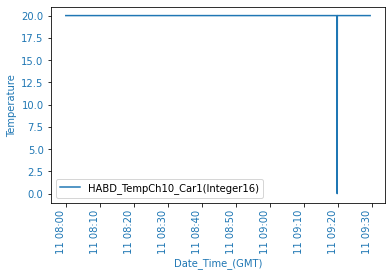

In [72]:
df = all_data[(all_data['Date_Time_(GMT)'] > start_date) & (all_data['Date_Time_(GMT)'] <= end_date)].copy().set_index('Date_Time_(GMT)')
df.plot(y=new_column, kind='line')
plt.xticks(color='C0', rotation='vertical')
plt.xlabel('Date_Time_(GMT)', color='C0', size=10)
plt.yticks(color='C0')
plt.ylabel('Temperature', color='C0', size=10)
plt.show()

In [60]:
# df = pd.DataFrame(coach_plot, columns=[coach_plot['Date_Time_(GMT)'], coach_plot[new_column]])
# df.plot(x='Date_Time_(GMT)', y=new_column, kind='line' )
# plt.show()

#### Create a date mask for the time frame

### Filter out the low temperatures

In [11]:
HABD_cols = [col for col in all_data]